In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import matplotlib.ticker as ticker

approach_map = {
    'Unadjusted':'orig',
    'IgnoreCOVID':'no_covid',
    'OutlierDetect':'with_outlier_detection'
}

series_map = pickle.load(open('pickled/series_map.pckl','rb'))

In [127]:
def plot(model='best',appr='Unadjusted',four_by_four=False):
    """ plots a given model class perorfmance (test-set and forecast)
    
    Args:
        model (str): one of 'best','arima','prophet','lstm','lstm_reg','weighted_ensemble'
        appr (str): one of 'Unadjusted','IgnoreCOVID','OutlierDetect'
        four_by_four (bool): whether to display the results in a 4x4 grid as opposed to one chart in each of 4 rows
    """
    orig_model = model
    fig, axs = plt.subplots(4, 1) if not four_by_four else plt.subplots(2, 2)
    for i, series in enumerate(series_map.keys()):
        results = pd.read_excel(os.path.join('fcst_results',
                                           '{}_series_{}_results.xlsx'.format(approach_map[appr],series)),
                                           sheet_name=['best_fcst','test_set_predictions','all_fcsts'])
        future = pd.read_csv(os.path.join('data','Future Passengers.csv'),parse_dates=['DATE'])
        bf = results['best_fcst']
        bf['DATE'] = pd.to_datetime(bf['DATE'])
        if orig_model == 'best':
            model = bf.loc[bf['MODEL'] != 'actual','MODEL'].values[0]
        ts = results['test_set_predictions']
        ts['DATE'] = pd.to_datetime(ts['DATE'])
        fc = results['all_fcsts']
        fc['DATE'] = pd.to_datetime(fc['DATE'])
        ax = axs[i] if not four_by_four else axs[0 if i in (0,1) else 1, i % 2]
        sns.lineplot(x='DATE',y='VALUES',data=bf.loc[bf['MODEL'] == 'actual'],label='actuals',ax=ax)
        sns.lineplot(x='DATE',y=model,data=ts,label=f'{model} test-set predictions',ax=ax)
        sns.lineplot(x='DATE',y=model,data=fc,label=f'{model} forecast',ax=ax)
        sns.lineplot(x='DATE',y=series,data=future,label='actuals Oct 21 - Jan 22 (validation)',ax=ax,linewidth=5,alpha=.5)
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.set(ylabel='Enplanements')
        ax.set(xlabel='')
        ax.set_title(series,size=20)
        ax.legend(loc='lower left',fontsize='large')
    plt.suptitle(f'{appr} Approach {orig_model.title()} Model Results',size=28)
    plt.show()

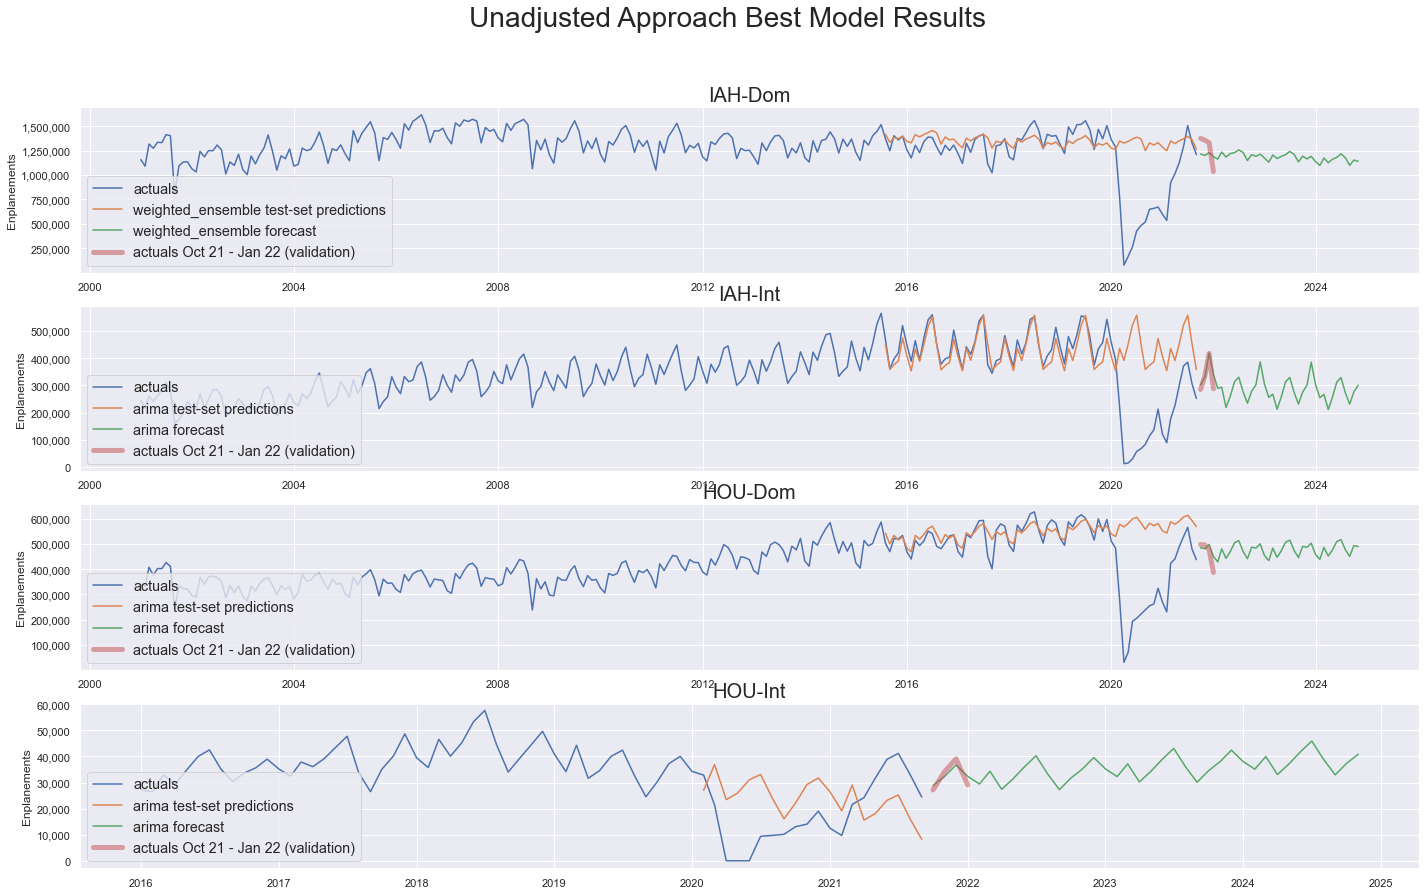

In [128]:
sns.set(rc={'figure.figsize':(24,14)})
plot()

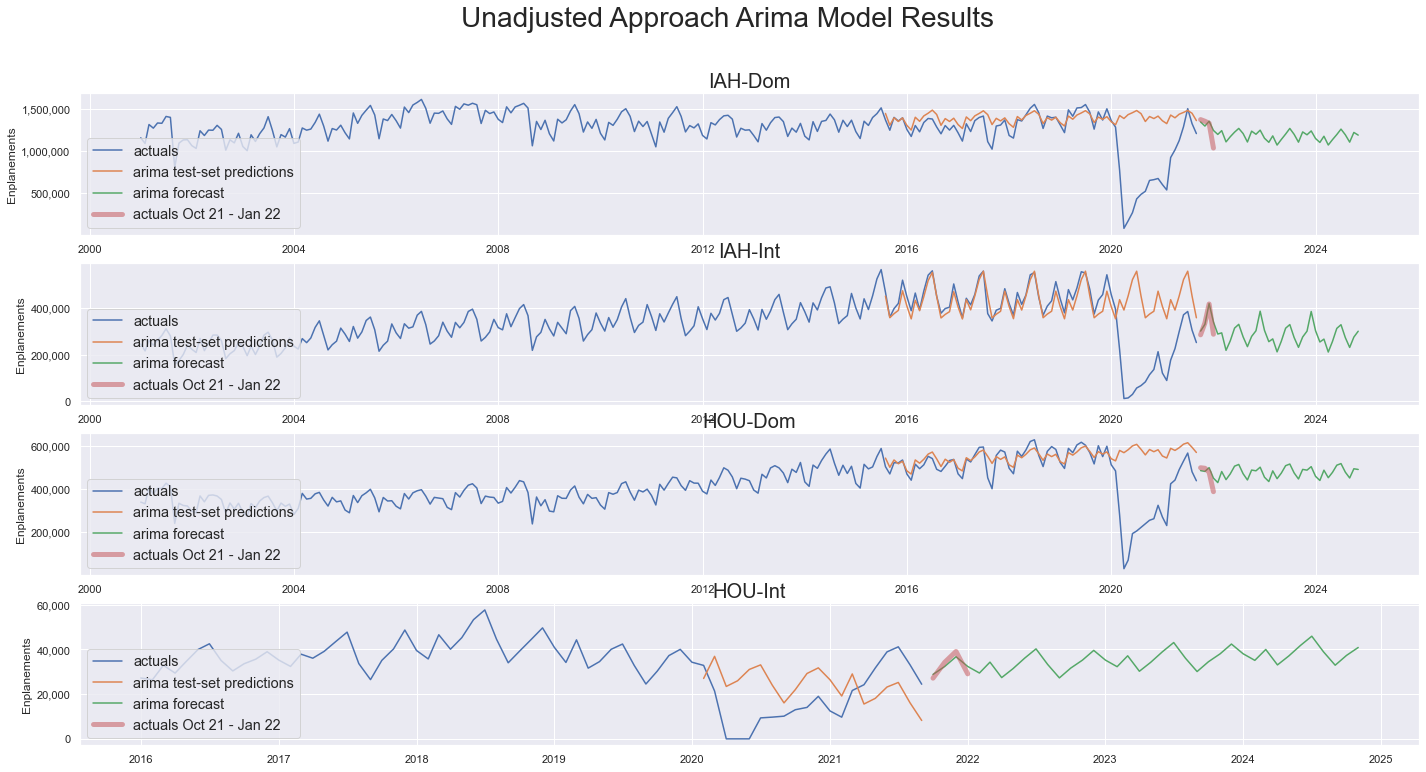

In [122]:
sns.set(rc={'figure.figsize':(24,12)})
plot('arima')

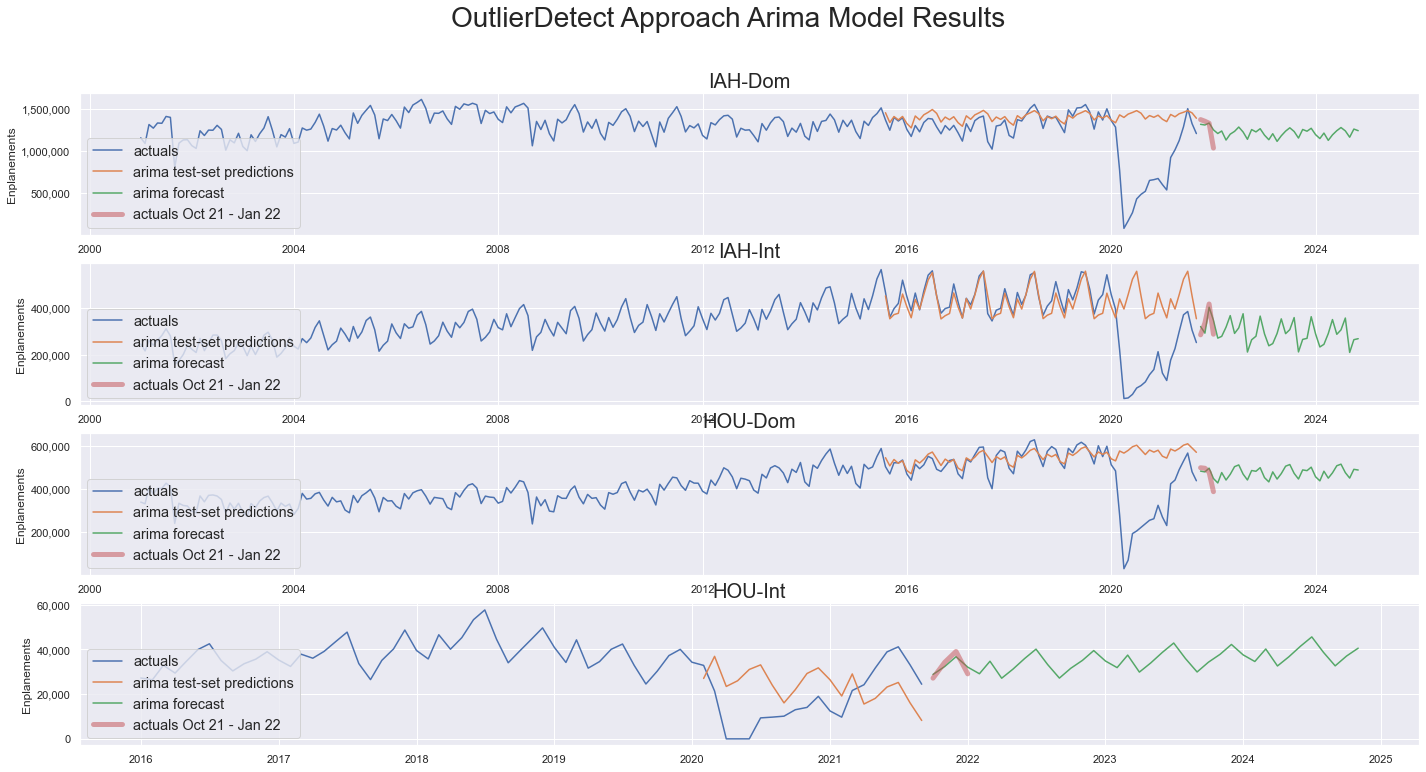

In [123]:
plot('arima','OutlierDetect')

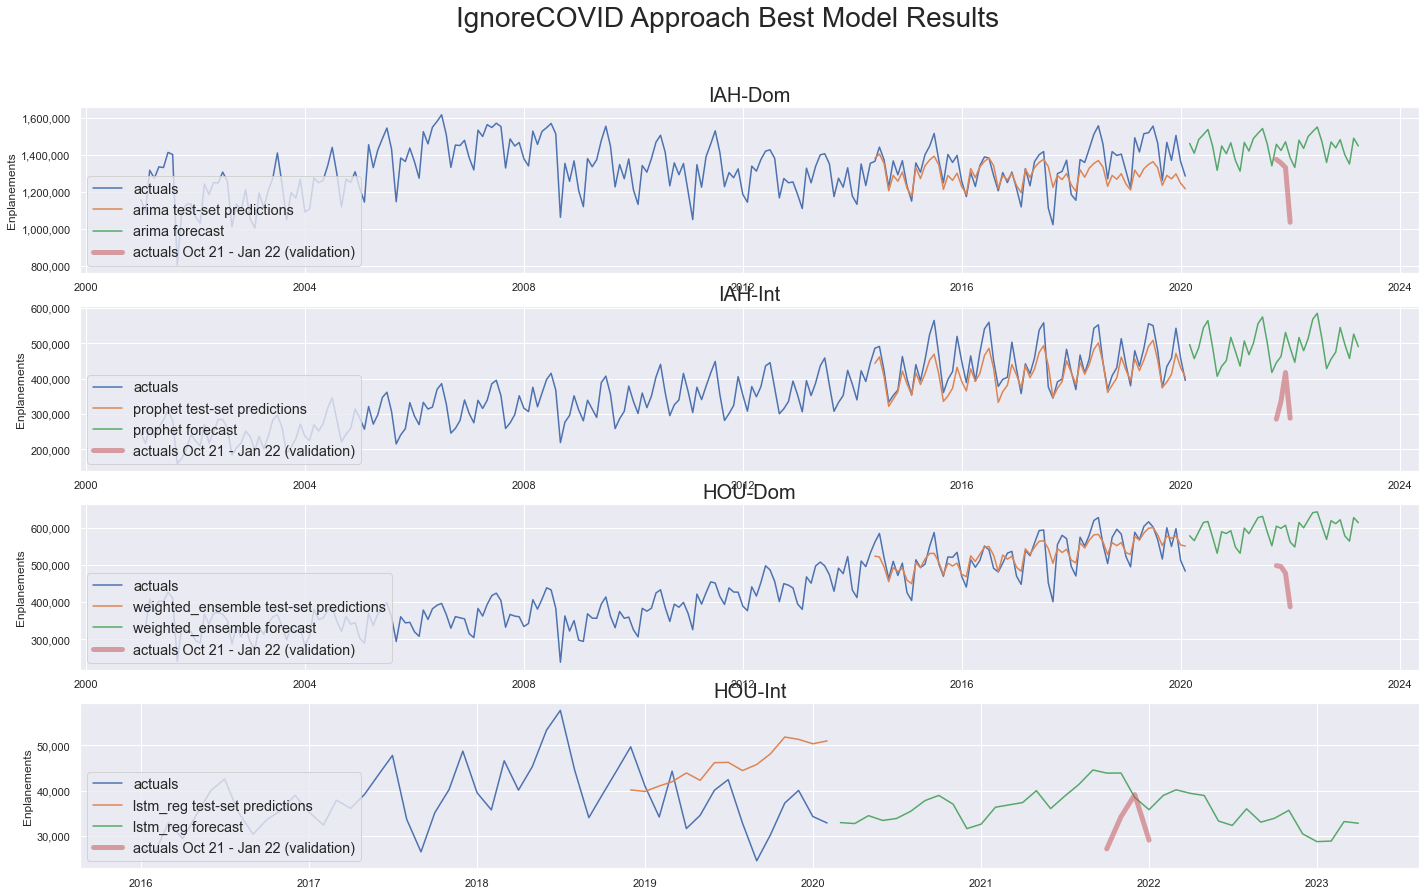

In [129]:
plot('best','IgnoreCOVID')